In [1]:
# This is the template for the submission. You can develop your algorithm in a regular Python script and copy the code here for submission.

# TEAM NAME ON KAGGLE
# "EXAMPLE_GROUP"

# GROUP NUMBER
# "group_XX"

# TEAM MEMBERS (E-MAIL, LEGI, KAGGLE USERNAME):
# "examplestudent1@ethz.ch", "12-345-678", "eXampl3stdNtone" 
# "examplestudent2@ethz.ch", "12-345-679", "xXexamplestudent2Xx"
# "examplestudent3@ethz.ch", "12-345-670", "mhealth_student_98"

In [1]:
from os import listdir
from os.path import isfile, join
import re

import pandas as pd
import numpy as np

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording
import matplotlib.pyplot as plt

# For interactive graphs
# %matplotlib widget

In [2]:
'''
Algorithm Description:
The algorithm is based on the following steps:
1) First we decide if there is cycling in the actiities, if there is we try to cut the cycling part based on the path taken:
    path 0: dont cut anything
    path 1: cut first third
    path 2: cut last third
    path 3: cut first third
    path 4: cut last third
2) We run an average filter with 0.31s window size to smooth the data
3) We use scipys find_peaks to find the peaks in the data with threshold at 1.1
4) Steps are len(peaks) TODO: maybe higher threshold and double steps

'''

'\nAlgorithm Description:\nThe algorithm is based on the following steps:\n1) First we decide if there is cycling in the actiities, if there is we try to cut the cycling part based on the path taken:\n    path 0: dont cut anything\n    path 1: cut first third\n    path 2: cut last third\n    path 3: cut first third\n    path 4: cut last third\n2) We run an average filter with 0.31s window size to smooth the data\n3) We use scipys find_peaks to find the peaks in the data with threshold at 1.1\n4) Steps are len(peaks) TODO: maybe higher threshold and double steps\n\n'

In [3]:
# Get the path for all test traces
'''
dir_traces_test = 'data/test'
filenames_test = [join(dir_traces_test, f) for f in listdir(dir_traces_test) if isfile(join(dir_traces_test, f))]
filenames_test.sort()
recordings_test = []
for fn in filenames_test:
    rec = Recording(fn)
    match = re.search(r'(\d{3})\.pkl$', fn)
    if match:
        id = int(match.group(1))
        rec.id = id
    else:
        raise ValueError(f'Filename {fn} does not match expected format')
    recordings_test.append(rec)
'''
    
    
dir_traces_train = 'data/test'
filenames_train = [join(dir_traces_train, f) for f in listdir(dir_traces_train) if isfile(join(dir_traces_train, f))]
filenames_train.sort()
axs = []
ays = []
azs = []
gxs = []
gys = []
gzs = []
paxs = []
pays = []
pazs = []
steps = []
sample_rates_phone = []
sample_rates_watch = []
alts = []
path_idxs = []
activities = []
for fn in filenames_train:
    rec = Recording(fn)
    axs.append(rec.data['ax'].values)
    ays.append(rec.data['ay'].values)
    azs.append(rec.data['az'].values)
    '''gxs.append(rec.data['gx'].values)
    gys.append(rec.data['gy'].values)
    gzs.append(rec.data['gz'].values)
    paxs.append(rec.data['phone_ax'].values)
    pays.append(rec.data['phone_ay'].values)
    pazs.append(rec.data['phone_az'].values)
    steps.append(rec.labels['step_count'])
    sample_rates_phone.append(rec.data['phone_ax'].samplerate)
    sample_rates_watch.append(rec.data['ax'].samplerate)
    alts.append(rec.data['altitude'].values)
    path_idxs.append(rec.labels['path_idx'])
    activities.append(rec.labels['activities'])'''

In [4]:
from scipy.signal import argrelextrema, find_peaks
def centered_moving_average(data, window_size):
    ret = np.cumsum(data, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size
def plot_array(arr):
    plt.figure(figsize=(25, 3))
    plt.plot(arr)
    plt.show()

def windowed_peak_detection(data, window_size):
    # Initialize an empty list to store the peaks
    peaks = []

    # Divide the data into windows
    for i in range(0, len(data), window_size):
        window = data[i:i + window_size]

        # Compute the relative maxima of the window
        window_peaks = argrelextrema(window, np.greater)

        # Add the indices of the peaks to the list
        peaks.extend(window_peaks[0] + i)

    return np.array(peaks)

def get_steps_from_peaks(data, peaks, threshold=1.25):
    steps=0
    for peak in peaks:
        if data[peak]>threshold:
            steps+=1
    return steps

def get_steps(data, window_size=80, threshold=1.25):
    peaks, _ = find_peaks(data, height=1.25, distance=80)
    steps = get_steps_from_peaks(data, peaks, threshold)
    return steps

with open('indices.txt', 'r') as f:
    indices = [line.rstrip() for line in f]
    

def pad_arrays(arr_list):
    max_len = max(len(arr) for arr in arr_list)
    return [np.pad(arr, (0, max_len - len(arr)), 'constant') for arr in arr_list]

In [6]:

def save_arrays(X, y, X_filename='X.npy', y_filename='y.npy'):
    np.save(X_filename, X)
    np.save(y_filename, y)

def load_arrays(X_filename='X.npy', y_filename='y.npy'):
    X = np.load(X_filename)
    y = np.load(y_filename)
    return X, y

type(path_idxs[0])

int

In [6]:
accel_mags_watch = []
accel_mags_phone = []
steps_num = []
samp_rates = []
for idx in range(len(axs)):
    mag = np.sqrt(axs[int(idx)]**2 + ays[int(idx)]**2 + azs[int(idx)]**2)
    accel_mags_watch.append(mag)
    '''same_len_list = pad_arrays([paxs[int(idx)], pays[int(idx)], pazs[int(idx)]])
    mag = np.sqrt(same_len_list[0]**2 + same_len_list[1]**2 + same_len_list[2]**2)
    accel_mags_phone.append(mag/9.81)
    steps_num.append(steps[int(idx)])
    samp_rates.append(int(sample_rates_phone[int(idx)]))
max_len = 0'''
'''idx = -1
for i,mag in enumerate(accel_mags_phone):
    if len(mag) > max_len:
        max_len = len(mag)
        idx = i

new_data = []
for i,mag in enumerate(accel_mags_watch):
    path_idx = path_idxs[int(indices[i])]
    act = activities[int(indices[i])]
    if 3 in act:
        if path_idx == 0:
            new_data.append(mag)
        elif path_idx == 2 or path_idx == 4:
            #discard last third
            end_idx = int(len(mag)*0.666)
            new_data.append(mag[:end_idx])
        elif path_idx == 1 or path_idx == 3:
            #discard first third
            start_idx = int(len(mag)*0.333)
            new_data.append(mag[start_idx:])
    else:
        new_data.append(mag)
    

X,y = load_arrays()

save_arrays(X, y, 'X.npy', 'y.npy')

type(samp_rates[0])'''



"idx = -1\nfor i,mag in enumerate(accel_mags_phone):\n    if len(mag) > max_len:\n        max_len = len(mag)\n        idx = i\n\nnew_data = []\nfor i,mag in enumerate(accel_mags_watch):\n    path_idx = path_idxs[int(indices[i])]\n    act = activities[int(indices[i])]\n    if 3 in act:\n        if path_idx == 0:\n            new_data.append(mag)\n        elif path_idx == 2 or path_idx == 4:\n            #discard last third\n            end_idx = int(len(mag)*0.666)\n            new_data.append(mag[:end_idx])\n        elif path_idx == 1 or path_idx == 3:\n            #discard first third\n            start_idx = int(len(mag)*0.333)\n            new_data.append(mag[start_idx:])\n    else:\n        new_data.append(mag)\n    \n\nX,y = load_arrays()\n\nsave_arrays(X, y, 'X.npy', 'y.npy')\n\ntype(samp_rates[0])"

In [8]:
rec = Recording(filenames_train[0])
fnshuff = np.random.permutation(filenames_train)
for fn in fnshuff:
    fn = filenames_train[14]
    rec = Recording(fn)
    if not (rec.labels['step_count'] == None):
        break
rec.data.keys()

dict_keys(['phone_my', 'phone_orientationz', 'gz', 'latitude', 'phone_gy', 'phone_mz', 'phone_orientationy', 'phone_rotz', 'gx', 'phone_lay', 'phone_rotx', 'timestamp', 'bearing', 'phone_mx', 'phone_gx', 'longitude', 'my', 'altitude', 'phone_roty', 'phone_rotm', 'packetNumber', 'ax', 'phone_ax', 'phone_gravz', 'phone_gz', 'mz', 'mx', 'phone_laz', 'phone_lax', 'speed', 'az', 'phone_orientationx', 'temperature', 'phone_az', 'phone_ay', 'ay', 'phone_gravy', 'phone_gravx', 'gy'])

In [9]:
cycling_data = 0
for i in range(len(activities)):
    if 3 in activities[i]:
        cycling_data += 1
cycling_data / len(activities)

0.14646464646464646

In [19]:
len(accel_mags_watch)
from sklearn.metrics import mean_absolute_percentage_error
len(y)

396

In [7]:
steps_pred = []
steps_true = []
for index in range(len(accel_mags_watch)):
    '''#index = 0
    if index in [6,8,12,26,28]:
        continue
    #rec = Recording(filenames_train[int(indices[index])])
    print(rec.labels)
    acc_mag = accel_mags_phone[index]
    WINDOW_WATCH=62
    WINDOW_PHONE=23
    window = samp_rates[index]*0.31'''
    
    cen_mov_avg_watch = centered_moving_average(accel_mags_watch[index], 62)
    #peaks = windowed_peak_detection(cen_mov_avg[:40000], 118) #window from paper = 118
    peaks, _ = find_peaks(cen_mov_avg_watch[:], height=1.1, distance=80)#80 for watch, samp_rates[index]//2.5 for phone
    steps_pred.append(len(peaks))
    '''steps_true.append(rec.labels['step_count'])
    print('pred:',len(peaks), '\ntrue:', rec.labels['step_count'])'''
    #plot_array(cen_mov_avg[:])
    #plot_array(cen_mov_avg_watch[:])
    #plot_array(centered_moving_average(accel_mags_watch[index], 62))
    #plot_array(cen_mov_avg[27000:32000])
    #plot_array(cen_mov_avg[40000:45000])
    #break
#print(mean_absolute_percentage_error(steps_true, steps_pred))

index: 0
{'path_idx': 2, 'activities': [0, 1, 3], 'step_count': 288, 'watch_loc': 2}
pred: 534 
true: 288


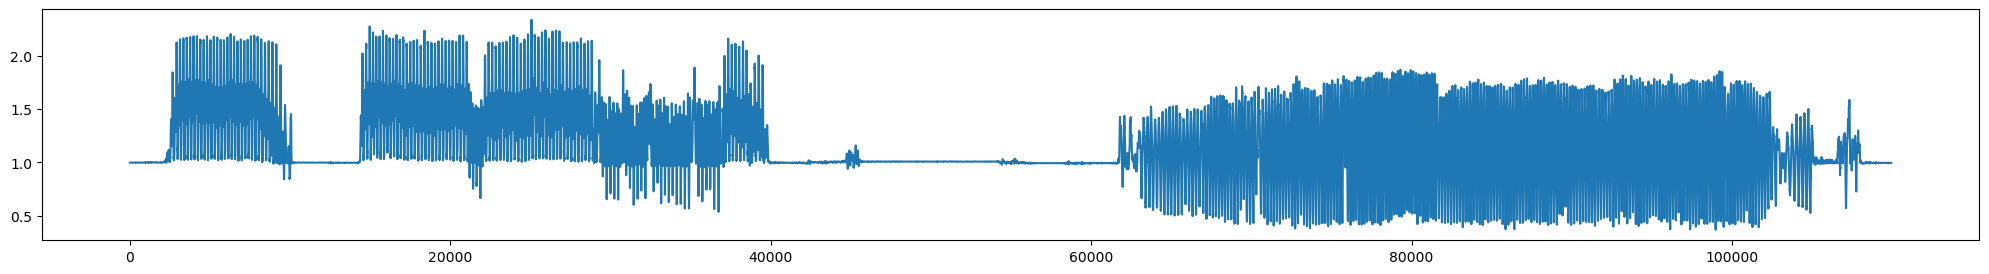

In [12]:
index = 0
print('index:', index)
rec = Recording(filenames_train[int(indices[index])])
print(rec.labels)
acc_mag = accel_mags_phone[index]
WINDOW_WATCH=62
WINDOW_PHONE=23
window = samp_rates[index]*0.31

cen_mov_avg = centered_moving_average(acc_mag, int(window))
cen_mov_avg_watch = centered_moving_average(accel_mags_watch[index], WINDOW_WATCH)
#peaks = windowed_peak_detection(cen_mov_avg[:40000], 118) #window from paper = 118
peaks, _ = find_peaks(cen_mov_avg_watch[:], height=1.1, distance=80)#80 for watch, samp_rates[index]//2.5 for phone
print('pred:',len(peaks), '\ntrue:', y[index])
#plot_array(cen_mov_avg[:])
plot_array(cen_mov_avg_watch[:])
#plot_array(alts[int(indices[index])][100:])
#plot_array(cen_mov_avg[27000:32000])
#plot_array(cen_mov_avg[40000:45000])

In [14]:
# Loop through all filenames to process recordings
filenames_test = []
submission = []
for filename in filenames_test:
    recording = Recording(filename)
    
    # Assumes filename format ends with a three-digit ID before ".pkl"
    match = re.search(r'(\d{3})\.pkl$', filename)
    if match:
        id = int(match.group(1))
        recording.id = id
    else:
        raise ValueError(f'Filename {filename} does not match expected format')

    # Placeholder for the algorithm to process the recording
    # Implement the logic to infer watch location, path index, step count,
    # and activities (standing, walking, running, cycling) here.
    # Ensure your algorithm is tolerant to missing data and does not crash
    # when optional smartphone data traces are missing.

    path_idx = 0  # Integer, path in {0, 1, 2, 3, 4}
    watch_loc = 0  # Integer, 0: left wrist, 1: belt, 2: right ankle
    standing = False  # Boolean, True if participant was standing still throughout the recording
    walking = False  # Boolean, True if participant was walking throughout the recording
    running = False  # Boolean, True if participant was running throughout the recording
    cycling = False  # Boolean, True if participant was cycling throughout the recording
    step_count = 0  # Integer, number of steps, must be provided for each recording

    predictions = {
        'Id': id, 
        'watch_loc': watch_loc, 
        'path_idx': path_idx,
        'standing': standing,
        'walking': walking,
        'running': running,
        'cycling': cycling,
        'step_count': step_count
        }

    submission.append(predictions)

In [9]:
# Write the predicted values into a .csv file to then upload the .csv file to Kaggle
# When cross-checking the .csv file on your computer, we recommend using a text editor and NOT excel so that the results are displayed correctly
# IMPORTANT: Do NOT change the name of the columns of the .csv file ("Id", "watch_loc", "path_idx", "standing", "walking", "running", "cycling", "step_count")
sol = []
for i in range(len(steps_pred)):
    pred = {
        'Id': i, 
        'watch_loc': 0, 
        'path_idx': 0,
        'standing': False,
        'walking': False,
        'running': False,
        'cycling': False,
        'step_count': steps_pred[i]
    }
    sol.append(pred)

submission_df = pd.DataFrame(sol, columns=['Id', 'watch_loc', 'path_idx', 'standing', 'walking', 'running', 'cycling', 'step_count'])
submission_df.to_csv('submission.csv', index=False)

In [16]:
X = np.array(pad_arrays(alts))
y = np.array(path_idxs)